In [65]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [62]:
#import dataset in dataframe df
file_path="C:/Users/welcome/Desktop/advanced_programming_assignment2/spotify_dataset.csv"
df = pd.read_csv(file_path)

# **Data Preprocessing and EDA*
# Display the first few rows of the dataset
print(df.head())

# Summary statistics of numerical features
print(df.describe())

print(df.info())

   Sr_no                track_id                 artists  \
0      0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1      1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2      2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3      3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4      4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love 

In [63]:
#show missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check for missing values
print(df.isnull().sum())

# Drop any rows with missing values
df.dropna(inplace=True)

Missing values in each column:
Sr_no               0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
Sr_no               0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [66]:
# Encoding of categorical columns

# Display first few rows of the dataset
print(df.head())

# Define categorical features
categorical_features = ['explicit', 'track_genre']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical features to numeric using Label Encoding
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])
    
# Display first few rows of the dataset after encoding
print(df.head())

   Sr_no                track_id                 artists  \
0      0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1      1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2      2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3      3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4      4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love 

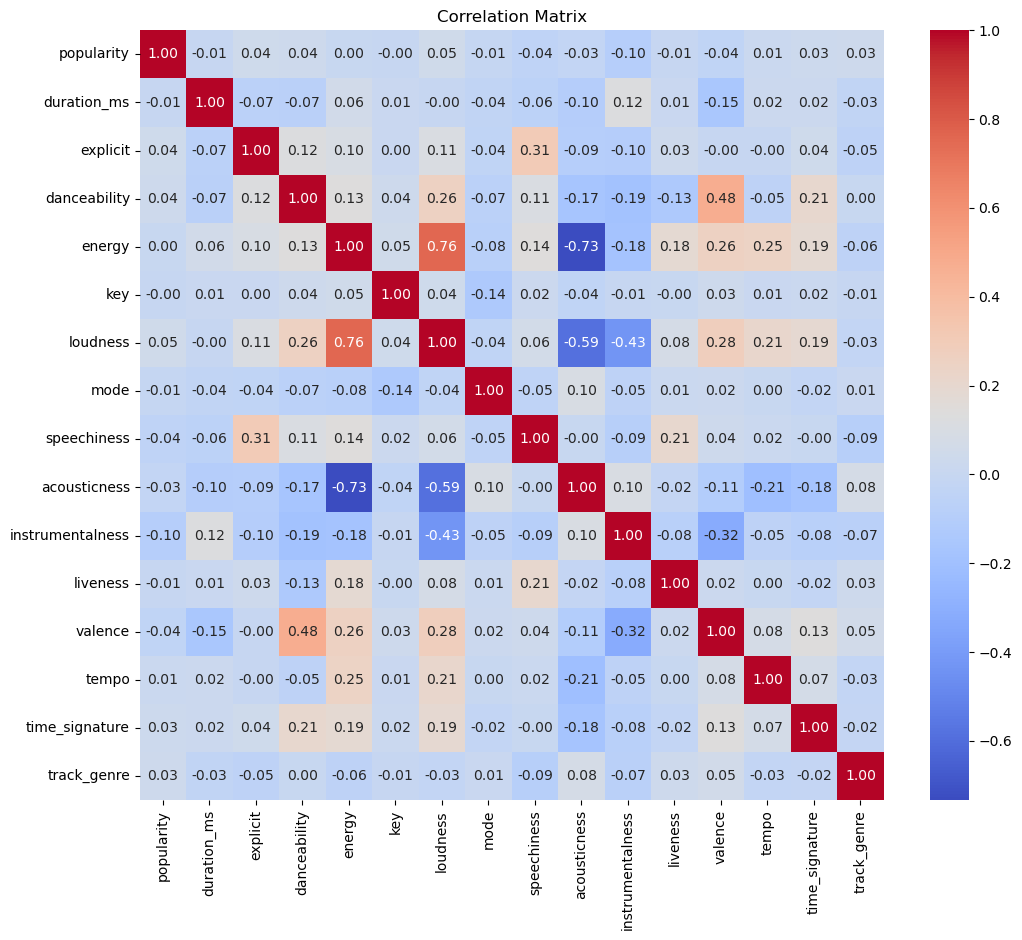

In [67]:
# Adjust the list of non-numeric column names
non_numeric_cols = ['Sr_no', 'track_id', 'artists', 'album_name', 'track_name']

# Drop non-numeric columns
df_numeric = df.drop(non_numeric_cols, axis=1)

# Handle missing values
df_numeric = df_numeric.dropna()


# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [73]:
# Select and scale the relevant features
features = df_numeric[['energy', 'loudness', 'valence', 'tempo']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [45]:
scaled_features

array([[-0.71714792,  0.30082834,  0.92930586, -1.14186279],
       [-1.88997974, -1.78474412, -0.79868969, -1.48971712],
       [-1.12266943, -0.2932884 , -1.36568823, -1.528312  ],
       ...,
       [-1.24194046, -0.52413497,  1.03730558,  0.34125493],
       [-0.53824138, -0.52294196, -0.23554828,  0.4607423 ],
       [-0.6137797 , -0.3867405 ,  0.90230593, -1.43270877]])

In [69]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\welcome\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [74]:
# Optionally, examine cluster centers to label them
cluster_centers = kmeans.cluster_centers_

In [75]:
df['cluster'].value_counts()

cluster
1    46228
2    41448
0    26323
Name: count, dtype: int64

In [49]:
# This is a placeholder step. You'll need to inspect cluster centers and assign meaningful labels based on your understanding
# For illustration purposes only: assigning labels based on the order here might not be accurate
# You should inspect and verify which cluster corresponds to high, mid, or low intensity
intensity_labels = ['low', 'mid', 'high']  # You might need to reorder these based on the cluster analysis
df['workout_intensity'] = df['cluster'].apply(lambda x: intensity_labels[x])

In [50]:
df['workout_intensity'].value_counts()

workout_intensity
mid     46234
high    41447
low     26319
Name: count, dtype: int64

In [51]:
# Apply PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

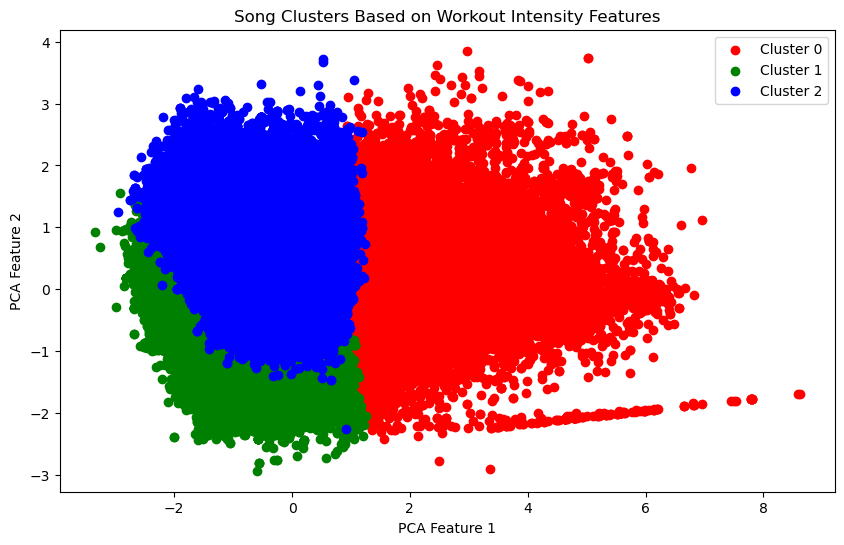

In [52]:
# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.scatter(reduced_features[df['cluster'] == i, 0], reduced_features[df['cluster'] == i, 1], color=color, label=f'Cluster {i}')
plt.title('Song Clusters Based on Workout Intensity Features')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Sr_no              114000 non-null  int64  
 1   track_id           114000 non-null  object 
 2   artists            113999 non-null  object 
 3   album_name         113999 non-null  object 
 4   track_name         113999 non-null  object 
 5   popularity         114000 non-null  int64  
 6   duration_ms        114000 non-null  int64  
 7   explicit           114000 non-null  bool   
 8   danceability       114000 non-null  float64
 9   energy             114000 non-null  float64
 10  key                114000 non-null  int64  
 11  loudness           114000 non-null  float64
 12  mode               114000 non-null  int64  
 13  speechiness        114000 non-null  float64
 14  acousticness       114000 non-null  float64
 15  instrumentalness   114000 non-null  float64
 16  li

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# # Load the dataset
# df = pd.read_csv("C:/Users/welcome/Desktop/advanced_programming_assignment2/spotify_with_intensity.csv")

# Define features and target variable
X = df[['danceability', 'energy', 'loudness', 'tempo', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence']]
y = df['cluster']  # Assuming 'cluster' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict with Random Forest Classifier
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict with Gradient Boosting Classifier
gb_pred = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Train XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predict with XGBoost Classifier
xgb_pred = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Compare the accuracies of all models
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("XGBoost Classifier Accuracy:", xgb_accuracy)


Random Forest Classifier Accuracy: 0.9880701754385965
Gradient Boosting Classifier Accuracy: 0.9876754385964912
XGBoost Classifier Accuracy: 0.9929605263157895


In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Define classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Perform cross-validation for Random Forest Classifier
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

# Perform cross-validation for Gradient Boosting Classifier
gb_cv_scores = cross_val_score(gb_classifier, X, y, cv=5, scoring='accuracy')

# Perform cross-validation for XGBoost Classifier
xgb_cv_scores = cross_val_score(xgb_classifier, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Random Forest Classifier Cross-Validation Scores:", rf_cv_scores)
print("Mean CV Accuracy:", rf_cv_scores.mean())
print()

print("Gradient Boosting Classifier Cross-Validation Scores:", gb_cv_scores)
print("Mean CV Accuracy:", gb_cv_scores.mean())
print()

print("XGBoost Classifier Cross-Validation Scores:", xgb_cv_scores)
print("Mean CV Accuracy:", xgb_cv_scores.mean())


Random Forest Classifier Cross-Validation Scores: [0.98368421 0.98258772 0.98938596 0.99048246 0.98359649]
Mean CV Accuracy: 0.9859473684210528

Gradient Boosting Classifier Cross-Validation Scores: [0.985      0.9829386  0.98723684 0.98846491 0.9825    ]
Mean CV Accuracy: 0.9852280701754387

XGBoost Classifier Cross-Validation Scores: [0.99061404 0.98982456 0.99342105 0.99421053 0.98890351]
Mean CV Accuracy: 0.9913947368421052
